# Regression Lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Example revisited

Modeling retinal ganglion spike train by fitting a temporal receptive field.

Poisson GLM spike count prediction based on stimulus history.

Adapted from [Neuromatch Academy](https://neuronline.sfn.org/scientific-research/tutorial-1-generalized-linear-models)

In [4]:
# data from Jonathan Pillow's lab: https://github.com/pillowlab/GLMspiketraintutorial
stimulus = np.load('retinal_ganglion_stimulus.npy')
spikes = np.load('retinal_ganglion_spikes.npy')

stimulus.shape, spikes.shape

((20000,), (20000,))

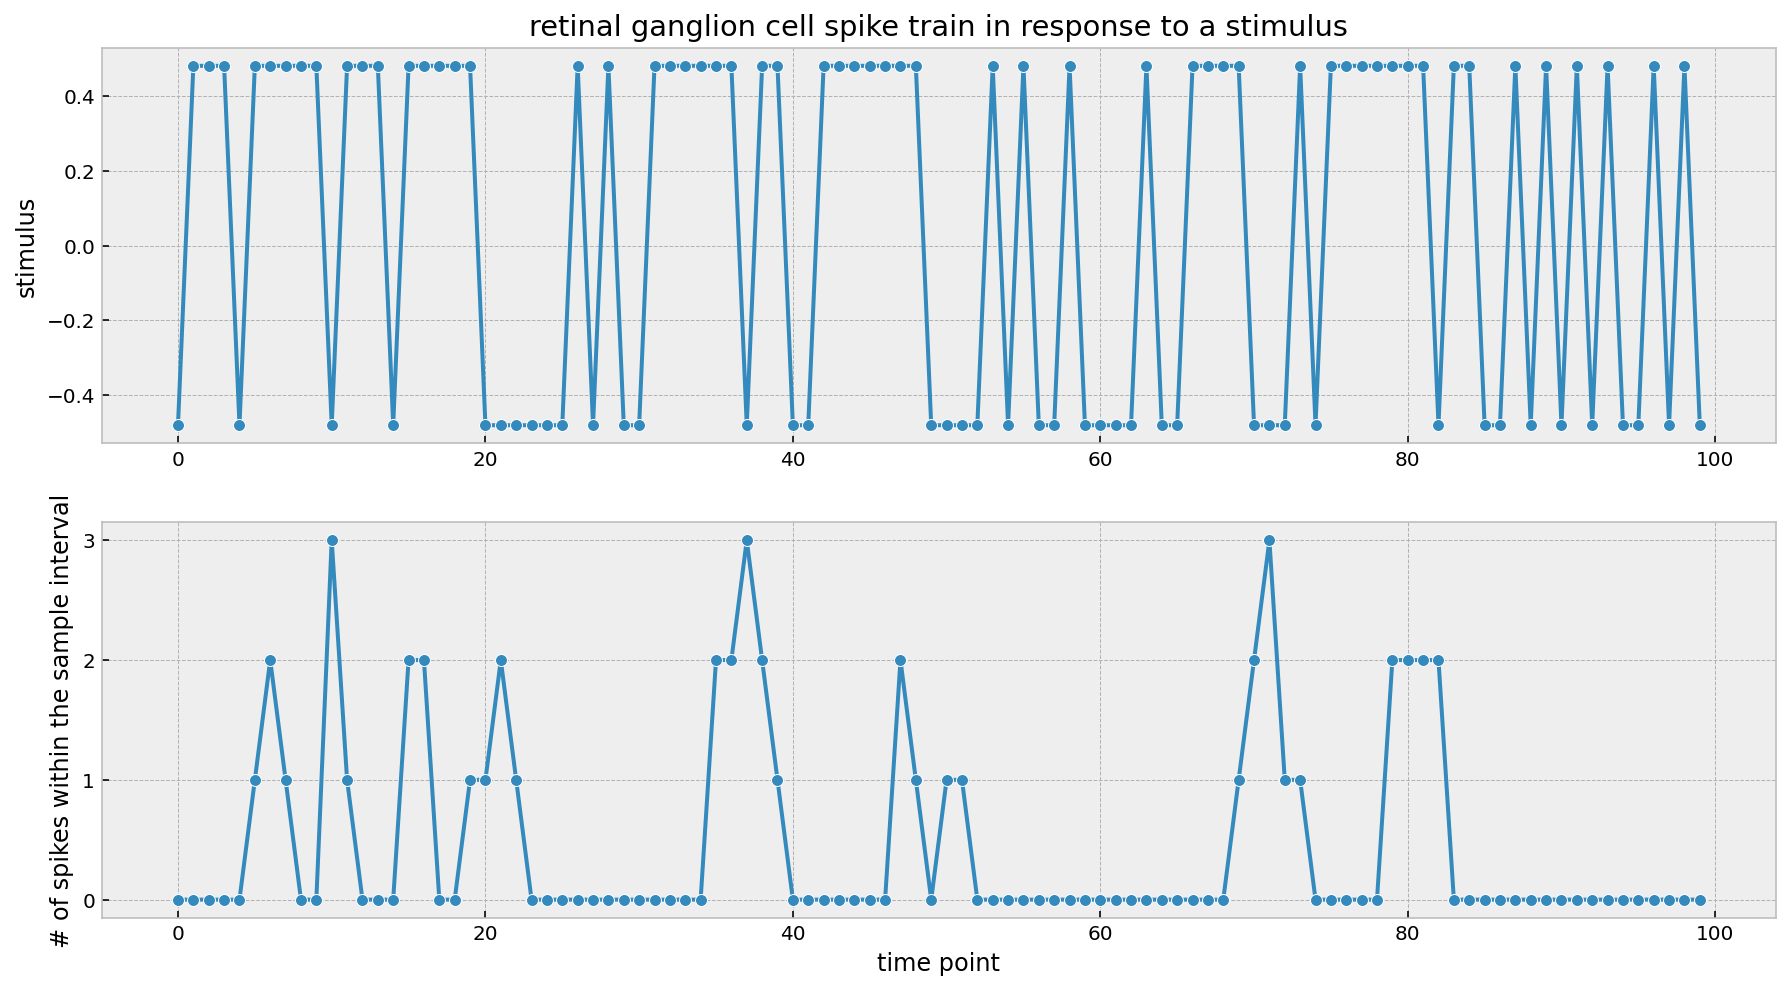

In [5]:
# retinal ganglion stimulus and spike data
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.plot(stimulus[:100], 'o-')
plt.ylabel('stimulus')
plt.title('retinal ganglion cell spike train in response to a stimulus')
plt.subplot(212)
plt.plot(spikes[:100], 'o-')
plt.yticks(range(4))
plt.ylabel('# of spikes within the sample interval')
plt.xlabel('time point');

# Lab

Build a Poisson GLM to predict spike frequency base on the preceding history of both the stimulus and the cell's spiking activity over the prior 25 time intervals. Furthermore, determine the optimal regularization strength for the model.

1. How to construct the prediction features $X$ and response spike counts $y$?

In [ ]:
def history_to_X(stimulus):
    T = len(stimulus)
    X = np.zeros((T, 25))
    for t in range(T):
        if t < 24:
            X[t,-t-1:] = stimulus[:t+1]  # last t columns of row t
        else:
            X[t,:] = stimulus[t-24:t+1]  # full row t
    return X

2. How to determine the regularization strength $\alpha$?

3. The final model...